# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the `whale_analysis.ipynb` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [85]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter)
%matplotlib inline


#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [86]:
# Import the data by reading in the CSV file and setting the DatetimeIndex. #Utilized only "." instead of ".." based on how I set-up my file structure.
# Review the first 5 rows of the DataFrame
whale_navs_df = pd.read_csv(Path("./Resources/whale_navs.csv"), index_col="date", parse_dates=True, infer_datetime_format=True)

display(whale_navs_df.head())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [135]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
daily_returns = whale_navs_df.pct_change().dropna()
display(daily_returns.head())
display(daily_returns.count())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


SOROS FUND MANAGEMENT LLC      1497
PAULSON & CO.INC.              1497
TIGER GLOBAL MANAGEMENT LLC    1497
BERKSHIRE HATHAWAY INC         1497
S&P 500                        1497
dtype: int64

---

## Quantative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

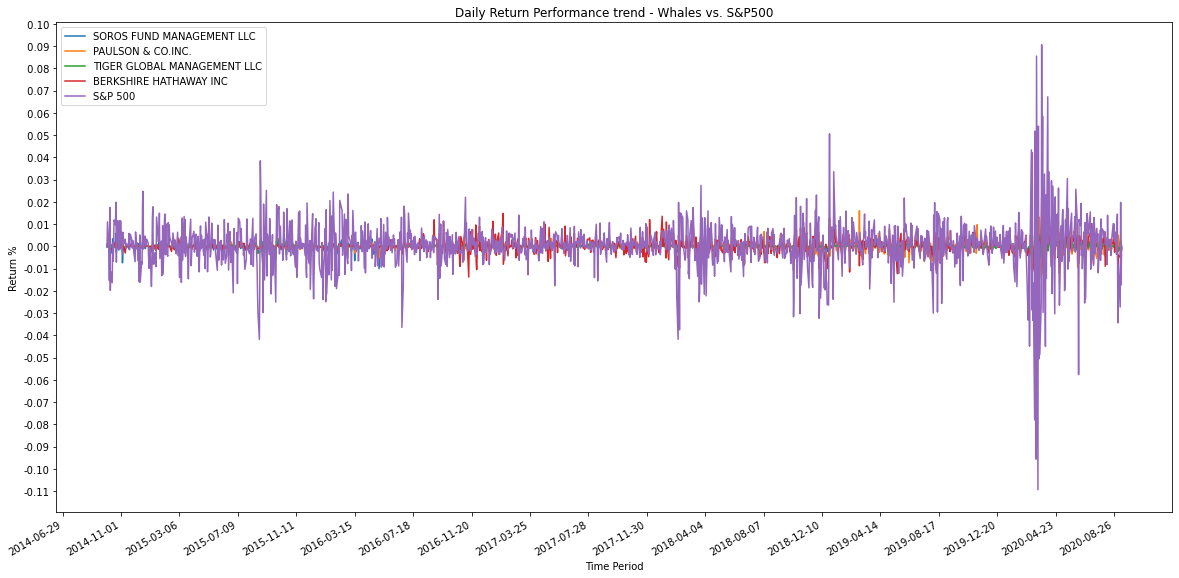

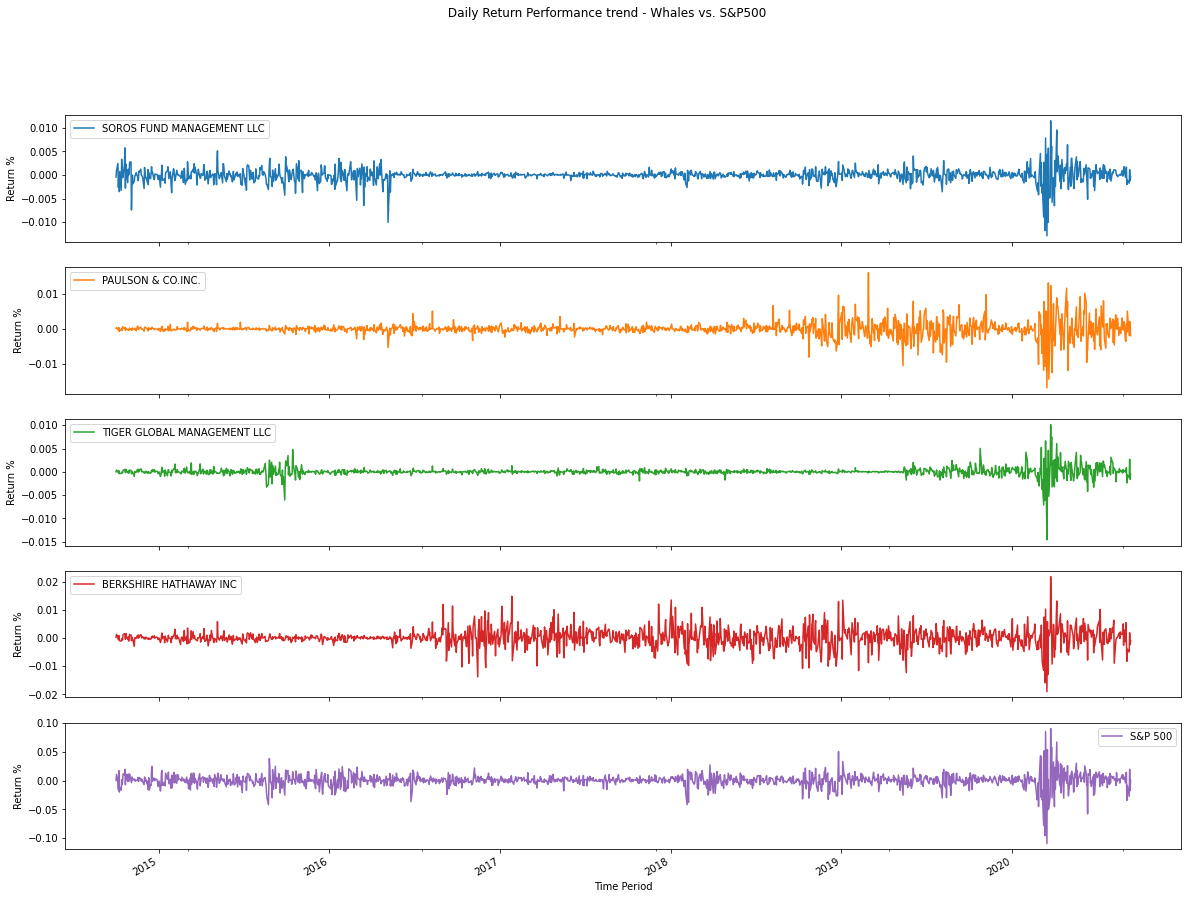

In [88]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
"""imported matplotlib.ticker to change formats for the x/y label of the main plot(object=ax) so that is is easier to visualize the return profile given the significant overlap when all
funds are plotted together. Additionally, the sub-plot allows for a quicker way to plot individual charts for multiple data columns of the dataframe. For example, if there were 20 funds,
seperate .plot methods would be inefficient to code. Additionally, if iteration is a viable option that seems more complex especially with a subplot parameter avaialble that requires
no specialized comments or documentation from the developer."""

ax = daily_returns.plot.line(title="Daily Return Performance trend - Whales vs. S&P500",figsize=(20,10),xlabel="Time Period",ylabel="Return %",legend="True")
daily_returns.plot.line(title=" Daily Return Performance trend - Whales vs. S&P500",figsize=(20,15),xlabel="Time Period",ylabel="Return %",legend="True",subplots=True)
ax.xaxis.set_major_locator(MultipleLocator(125))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
ax.yaxis.set_major_formatter(FormatStrFormatter("% 0.2f")) #Because the subplot is a numpy.ndarray object it runs into an attribute error trying to utilize the set/format commands


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [89]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns = (1+daily_returns).cumprod()
display(cumulative_returns.head())
display(cumulative_returns.tail())


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,0.999558,1.000150,1.000013,1.000171,1.000154
2014-10-03,1.000609,1.000518,1.000407,1.001420,1.011165
2014-10-06,1.003066,1.000510,1.000474,1.001688,1.009982
2014-10-07,1.000437,1.000193,1.000265,1.001100,0.994392
2014-10-08,1.000828,1.000563,1.000507,1.001943,1.011783


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

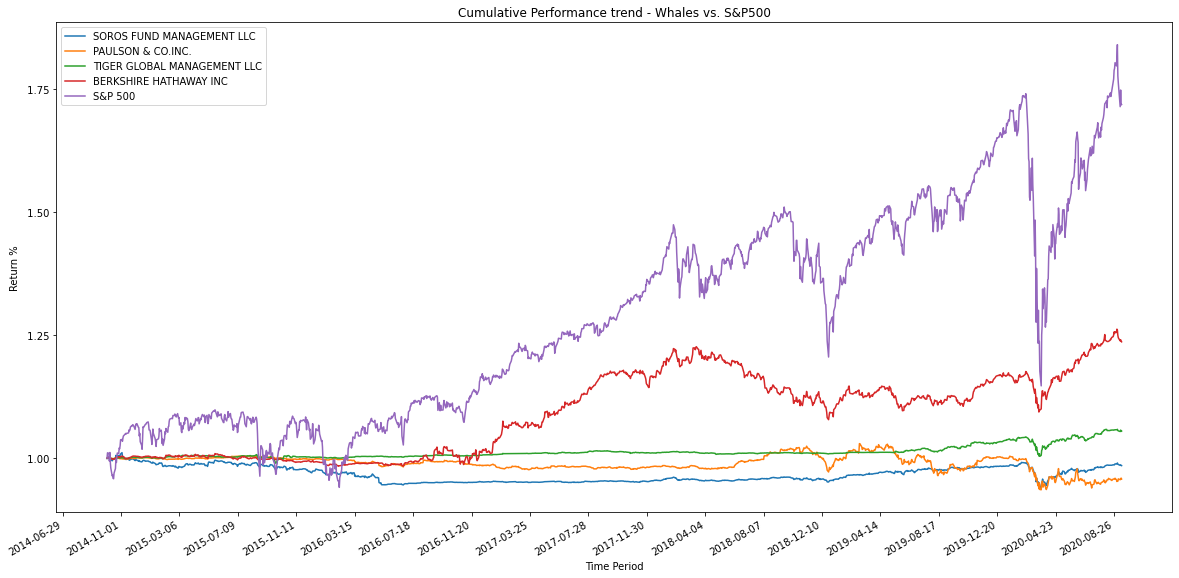

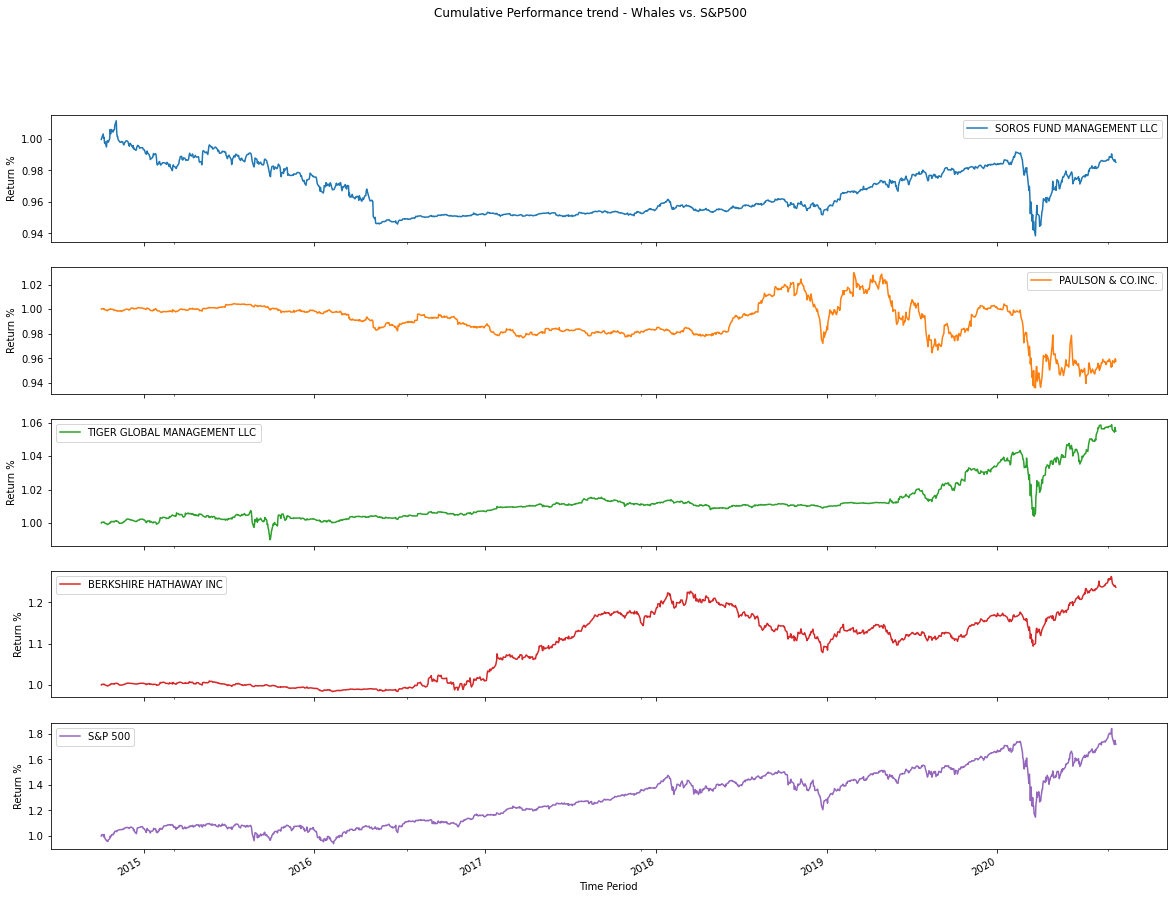

In [90]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
"""imported matplotlib.ticker to change formats for the x/y label of the main plot(object=ax) so that is is easier to visualize the return profile given the significant overlap when all
funds are plotted together. Additionally, the sub-plot allows for a quicker way to plot individual charts for multiple data columns of the dataframe. For example, if there were 20 funds,
seperate .plot methods would be inefficient to code. Additionally, if iteration is a viable option that seems more complex especially with a subplot parameter avaialble that requires
no specialized comments or documentation from the developer."""

ax = cumulative_returns.plot.line(title="Cumulative Performance trend - Whales vs. S&P500",figsize=(20,10),xlabel="Time Period",ylabel="Return %",legend="True")
cumulative_returns.plot.line(title="Cumulative Performance trend - Whales vs. S&P500",figsize=(20,15),xlabel="Time Period",ylabel="Return %",legend="True",subplots=True)
ax.xaxis.set_major_locator(MultipleLocator(125))
ax.yaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_major_formatter(FormatStrFormatter("% 0.2f")) #Because the subplot is a numpy.ndarray object it runs into an attribute error trying to utilize the set/format commands



#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** On a cumulative basis all four funds out-perfored the S&P 500 at different time intervals during 2015-2016. However, from the 2nd-half of 2016 to the end of the data series the S&P cumulative returns significantly out-performed the other funds. 

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns Spread - Whales vs. S&P 500'}>

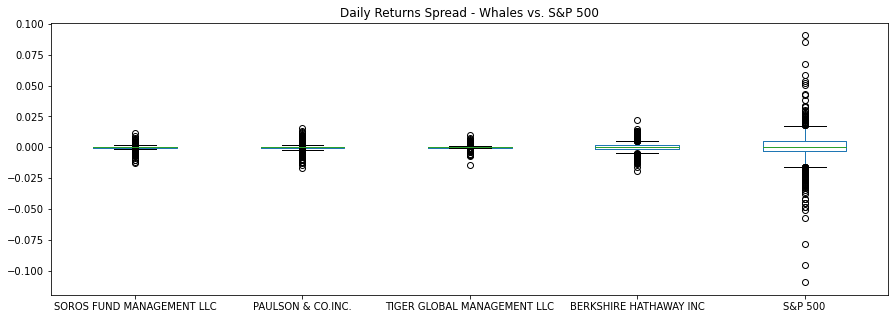

In [91]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns.plot.box(title="Daily Returns Spread - Whales vs. S&P 500",figsize=(15,5))


#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns Spread - Whales'}>

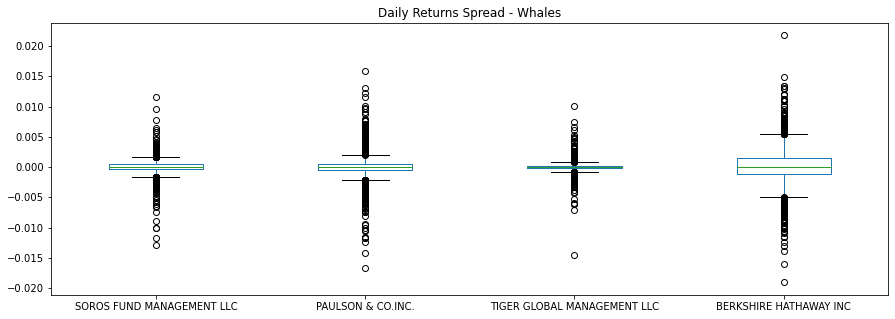

In [92]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
daily_returns_minusSP = daily_returns.drop(["S&P 500"],axis=1)

daily_returns_minusSP.plot.box(title="Daily Returns Spread - Whales",figsize=(15,5))


#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** I'll answer this in two parts:
            -From the perspective of the volatility of outliers the greatest spread is Berkshire Hathaway and the smallest spread is Tiger Global Management. 
            -From the perspective of the volatility of the 50% of data points around the average return, the answer ends up being the same with Berkshire's Box being the widest and Tiger Global Management LLC being narrowest.

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [93]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
standard_deviation_sorted = daily_returns.std().sort_values()
display(standard_deviation_sorted)

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [96]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
trading_days = 252
annualized_std = standard_deviation_sorted * np.sqrt(trading_days)
display(annualized_std)

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-30,0.002287,0.000361,0.000302,0.000919,0.011231
2014-10-31,0.002341,0.000364,0.000312,0.000952,0.011443
2014-11-03,0.002393,0.000354,0.000306,0.000939,0.011249
2014-11-04,0.002908,0.000354,0.000322,0.000969,0.011285
2014-11-05,0.002903,0.000356,0.000318,0.000958,0.010662
...,...,...,...,...,...
2020-09-04,0.000866,0.002498,0.000801,0.003624,0.010302
2020-09-08,0.000934,0.002302,0.000817,0.003229,0.012040
2020-09-09,0.000938,0.002186,0.001031,0.003226,0.012789


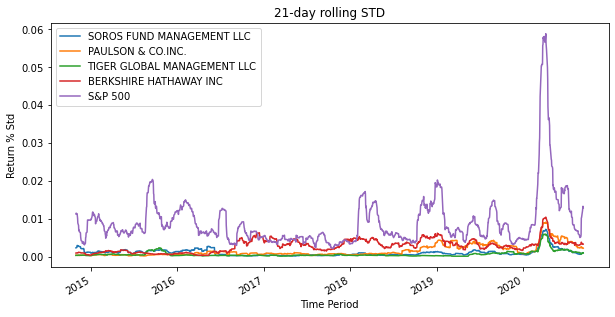

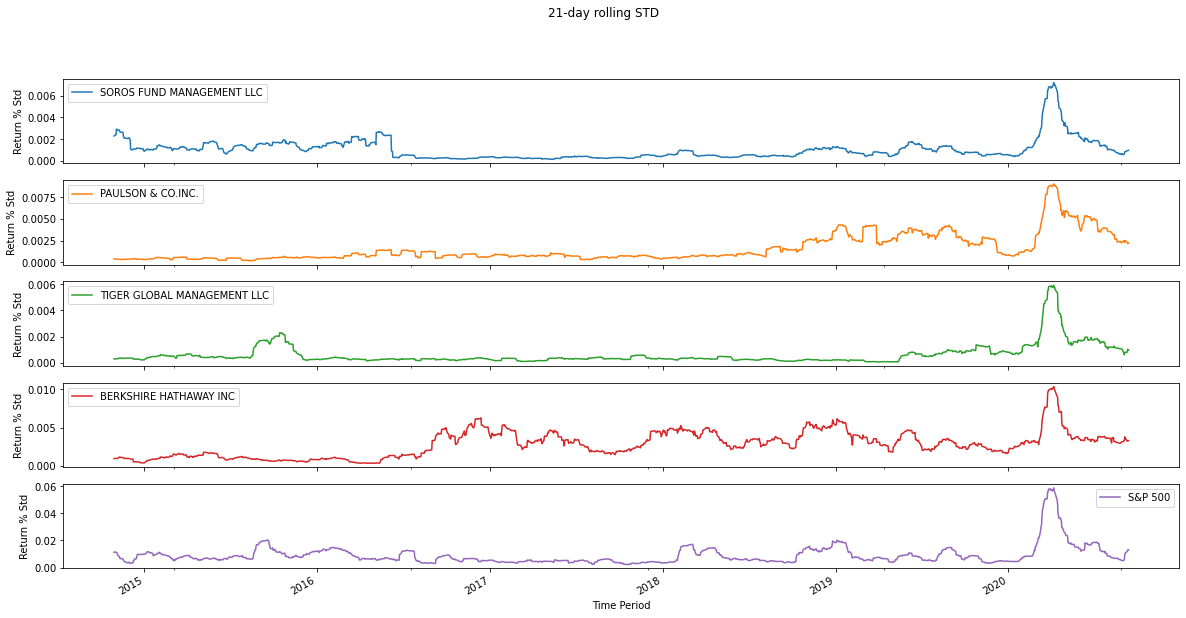

In [136]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
daily_returns.rolling(window=21).std().dropna().plot(title="21-day rolling STD",xlabel="Time Period",ylabel="Return % Std",legend="True",figsize=(10,5))
daily_returns.rolling(window=21).std().dropna().plot(title="21-day rolling STD",subplots=True,xlabel="Time Period",ylabel="Return % Std",legend="True",figsize=(20,10))

display(daily_returns.rolling(window=21).std().dropna())

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

array([<AxesSubplot:xlabel='Time Period', ylabel='Return % Std'>,
       <AxesSubplot:xlabel='Time Period', ylabel='Return % Std'>,
       <AxesSubplot:xlabel='Time Period', ylabel='Return % Std'>,
       <AxesSubplot:xlabel='Time Period', ylabel='Return % Std'>],
      dtype=object)

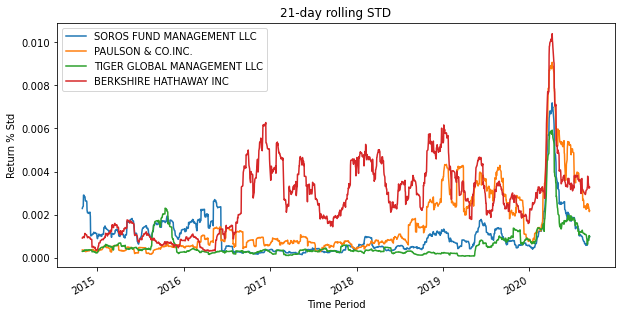

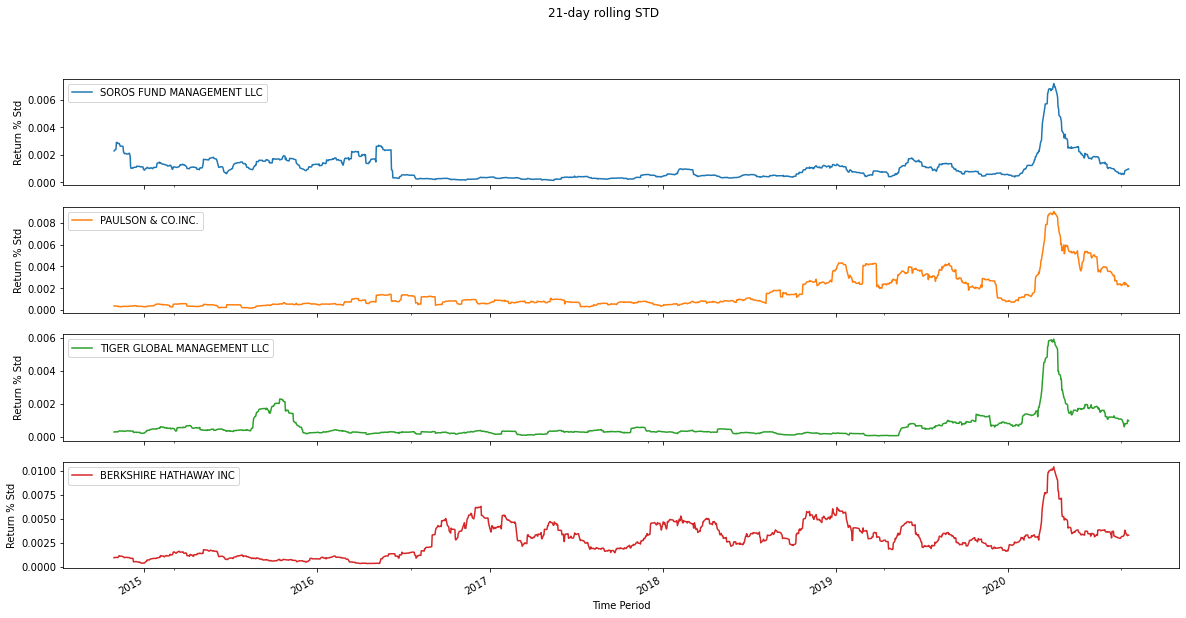

In [101]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
daily_returns_minusSP.rolling(window=21).std().dropna().plot(title="21-day rolling STD",xlabel="Time Period",ylabel="Return % Std",legend="True",figsize=(10,5))
daily_returns_minusSP.rolling(window=21).std().dropna().plot(title="21-day rolling STD",subplots=True,xlabel="Time Period",ylabel="Return % Std",legend="True",figsize=(20,10))


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500? 

None, because their returns deviated less from their average compared to the S&P 500.

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases? 

For most time periods the risk did not increase at the same time, except in 2020 when all portfolios and the S&P 500 had a sharp increase in risk. For other time periods each portfolio experienced increased risk at different points of the 21-day rolling std. 

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

Berkshire poses the most risk but it has changed over-time. From the middle of 2016 to 2020 it was the riskest portfolio for most of the time series. Prior to this date it was not the riskest. Paulson & Co. Inc seems was risker for specific smaller time intervals than Berkshire in 2019 and 2020. 

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [103]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
trading_days = 252
annualized_return = daily_returns.mean().sort_values() * trading_days
display(annualized_return)

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [105]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
sharpe_ratios = annualized_return/annualized_std
display(sharpe_ratios.sort_values())

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe Ratios'}>

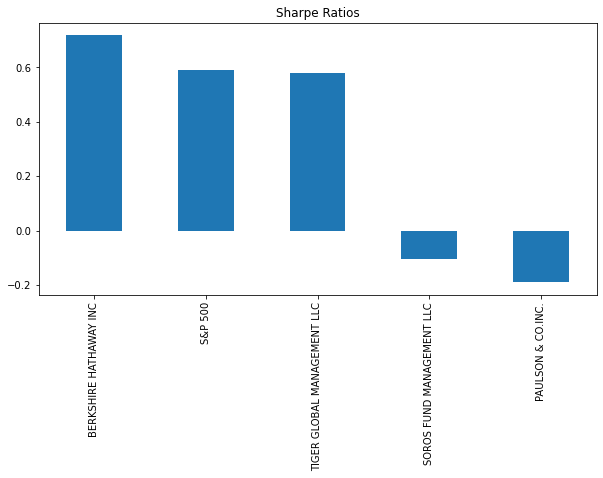

In [109]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios.sort_values(ascending=False).plot.bar(title="Sharpe Ratios",figsize=(10,5))


#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** 

           Bershire = BEST    
           
           Paulson & CO. Inc = WORST

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [144]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
market_variance = daily_returns["S&P 500"].rolling(window=60).var().dropna()
display(market_variance)

date
2014-12-26    0.000078
2014-12-29    0.000078
2014-12-30    0.000077
2014-12-31    0.000079
2015-01-02    0.000075
                ...   
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, Length: 1438, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [145]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
portfolio_01_covar = daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(daily_returns["S&P 500"]).dropna()
display(portfolio_01_covar.tail())

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [122]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
portfolio_01_beta = portfolio_01_covar/market_variance
display(portfolio_01_beta.tail())

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [140]:
# Calculate the average of the 60-day rolling beta
portfolio_01_beta_avg = portfolio_01_beta.mean()
display(portfolio_01_beta_avg)

0.2214986101354593

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Berkshire 60-day avgerage rolling beta'}, xlabel='Time Period', ylabel='Beta'>

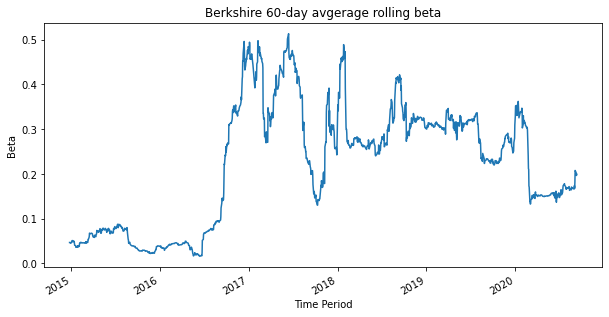

In [146]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
portfolio_01_beta.plot.line(title="Berkshire 60-day avgerage rolling beta",figsize=(10,5), xlabel="Time Period",ylabel="Beta")


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [147]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
portfolio_02_covar = daily_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(daily_returns["S&P 500"]).dropna()
display(portfolio_02_covar.tail())


date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [128]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
portfolio_02_beta = portfolio_02_covar/market_variance
display(portfolio_02_beta.tail())


date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [142]:
# Calculate the average of the 60-day rolling beta
portfolio_02_beta_avg = portfolio_02_beta.mean()
display(portfolio_02_beta_avg)


0.03093001487238774

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Tiger Management 60-day average rolling beta'}, xlabel='Time Period', ylabel='Beta'>

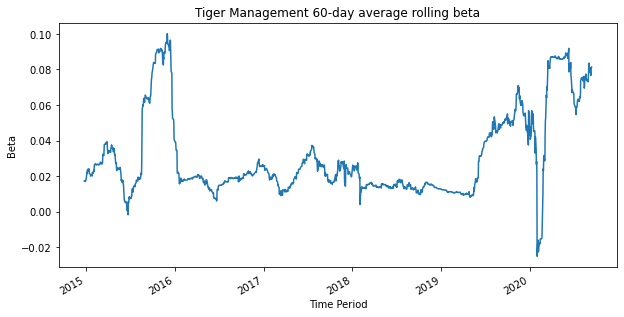

In [150]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
portfolio_02_beta.plot.line(title="Tiger Management 60-day average rolling beta",figsize=(10,5), xlabel="Time Period",ylabel="Beta")



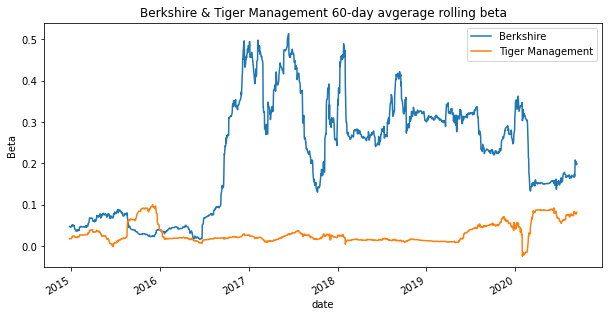

In [149]:
ax = portfolio_01_beta.plot.line(title="Berkshire & Tiger Management 60-day avgerage rolling beta",figsize=(10,5), xlabel="Time Period",ylabel="Beta")
portfolio_02_beta.plot.line(ax=ax)
ax.legend(["Berkshire","Tiger Management"])

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** Berkshire is more sensitive to movements in the S&P500 due to the higher rolling 60-day beta.


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** Berkshire is the recommendation to include given it has the best annualized sharpe ratio (best profile of return vs risk) & the higher beta
could beneift the diversification strategy of the portfolio, especially if the existing mix of investments currently do not have some higher beta stocks relative to the S&P 500 index. Additionally, because the beta is less than 1 it still moves less than the market so the additional return makes plus the low beta makes it attractive to add to the portfolio.

---